# Isurance Amount Prediction using Linear Regression

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading dataset
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#  check for duplicates

# df.duplicated().sum()

index = df[df.duplicated()].index
df.drop(index = index, inplace = True)

In [10]:
## split the data into train and test for tuning into the model
from sklearn.model_selection import train_test_split


In [11]:
X = df.drop(columns = ["charges"])
y = df["charges"]
X.shape , y.shape

((1337, 6), (1337,))

In [12]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
X_train , X_test, y_train , y_test = train_test_split(X , y, test_size = 0.20, random_state = 42)


print(f" shape of X: {X.shape}")
print(f" shape of X_train: {X_train.shape}")
print(f" shape of X_test: {X_test.shape}")
print(f" shape of y_train: {y_train.shape}")
print(f" shape of y_test: {y_test.shape}")

 shape of X: (1337, 6)
 shape of X_train: (1069, 6)
 shape of X_test: (268, 6)
 shape of y_train: (1069,)
 shape of y_test: (268,)


In [14]:
temp_df_train = X_train.copy()
temp_df_train["charges"] = y_train

temp_df_test = X_test.copy()
temp_df_test["charges"] = y_test

In [15]:
## printing upper whisker , lower whisker and outliers in each column
def outlier(X_train, X_test):

  num_cols = [col for col in X_train.columns if X_train[col].dtypes != "object"]
  for col in num_cols:
    q1 = X_train[col].quantile(0.25)
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr

    num_outlier_train = len(X_train[(X_train[col] > uw) | (X_train[col] < lw)])
    num_outlier_test = len(X_test[(X_test[col] > uw) | (X_test[col] < lw)])
    print(f"for column {col}, lw = {lw}, uw = {uw}")
    print(f"no. of train_outliers --> {num_outlier_train}, {round(num_outlier_train/ len(X_train),4) * 100}%")
    print(f"no. of test_outliers --> {num_outlier_test} ,  {round(num_outlier_test/ len(X_test),4) * 100}%")
    print("---------------------------")



In [17]:
outlier(temp_df_train, temp_df_test)

for column age, lw = -9.0, uw = 87.0
no. of train_outliers --> 0, 0.0%
no. of test_outliers --> 0 ,  0.0%
---------------------------
for column bmi, lw = 13.805, uw = 46.805
no. of train_outliers --> 6, 0.5599999999999999%
no. of test_outliers --> 3 ,  1.1199999999999999%
---------------------------
for column children, lw = -3.0, uw = 5.0
no. of train_outliers --> 0, 0.0%
no. of test_outliers --> 0 ,  0.0%
---------------------------
for column charges, lw = -12808.709800000004, uw = 34006.657400000004
no. of train_outliers --> 106, 9.92%
no. of test_outliers --> 38 ,  14.180000000000001%
---------------------------


In [18]:
uw = 34520.14241875
lw = -12875.817631250002
out_df = temp_df_train[(temp_df_train["charges"] > uw) | (temp_df_train["charges"] < lw)]
out_df.head()

,age,sex,bmi,children,smoker,region,charges
1240,52,male,41.80,2,yes,southeast,47269.8540
1062,59,male,41.14,1,yes,southeast,48970.2476
158,30,male,35.53,0,yes,southeast,36950.2567
850,37,female,30.78,0,yes,northeast,37270.1512
901,60,male,40.92,0,yes,southeast,48673.5588


<Axes: xlabel='smoker', ylabel='charges'>

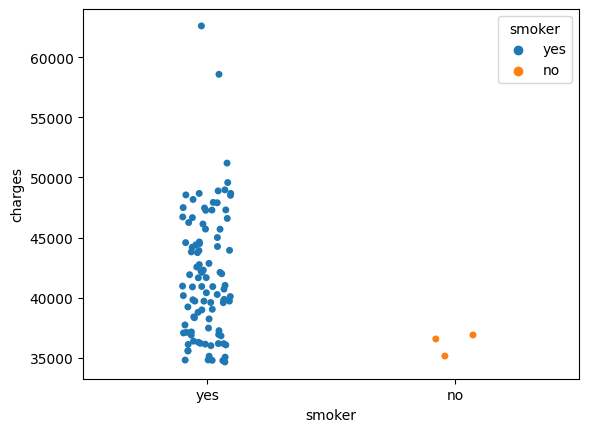

In [19]:
sns.stripplot(data = out_df, x = "smoker", y= "charges", hue = "smoker")

<Axes: >

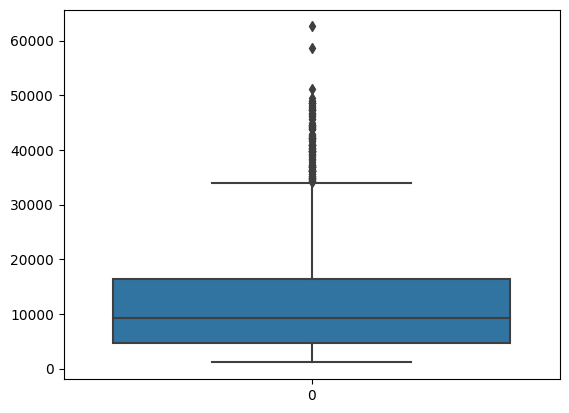

In [20]:
# chaecking distribution of charrges column i.e. output coulmn
sns.boxplot(temp_df_train["charges"])

In [63]:
# after taking its log transformation it became normally distributrd
sns.boxplot(np.log(temp_df_train["charges"]))

KeyError: 'charges'

<Axes: xlabel='charges', ylabel='Density'>

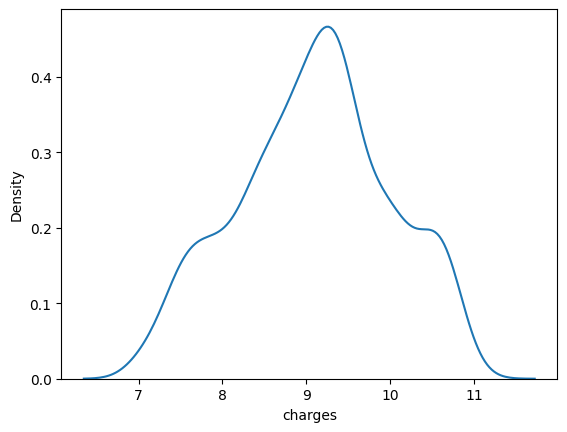

In [22]:
sns.kdeplot(np.log(temp_df_train["charges"]))

In [23]:
X_train.head()

,age,sex,bmi,children,smoker,region
1114,23,male,24.510,0,no,northeast
968,21,male,25.745,2,no,northeast
599,52,female,37.525,2,no,northwest
170,63,male,41.470,0,no,southeast
275,47,female,26.600,2,no,northeast


In [24]:
## encodeing data to feed into machine learning moodel
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

gender_encode = OrdinalEncoder()
smoker_encode = OrdinalEncoder()
region_encode = OneHotEncoder(sparse_output = False, drop = "first")

X_train["sex"] = gender_encode.fit_transform(X_train[["sex"]])
X_test["sex"] = gender_encode.transform(X_test[["sex"]])

X_train["smoker"] = smoker_encode.fit_transform(X_train[["smoker"]])
X_test["smoker"] = smoker_encode.transform(X_test[["smoker"]])

In [25]:
X_train.head()

,age,sex,bmi,children,smoker,region
1114,23,1.0,24.510,0,0.0,northeast
968,21,1.0,25.745,2,0.0,northeast
599,52,0.0,37.525,2,0.0,northwest
170,63,1.0,41.470,0,0.0,southeast
275,47,0.0,26.600,2,0.0,northeast


In [26]:
region_encode.fit_transform(X_train[["region"]])

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [27]:
region_encode.get_feature_names_out()

array(['region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [28]:
temp_df_train = pd.DataFrame(region_encode.fit_transform(X_train[["region"]]),
                             columns = region_encode.get_feature_names_out(),
                             index = X_train.index)
temp_df_test = pd.DataFrame(region_encode.transform(X_test[["region"]]),
                            columns = region_encode.get_feature_names_out(),
                            index = X_test.index)

In [29]:
# concat

X_train = pd.concat([X_train, temp_df_train], axis = 1)
X_test = pd.concat([X_test, temp_df_test], axis = 1)

In [30]:
# remove region column

X_train.drop(columns = ["region"], inplace = True)
X_test.drop(columns = ["region"], inplace = True)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 1114 to 1127
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1069 non-null   int64  
 1   sex               1069 non-null   float64
 2   bmi               1069 non-null   float64
 3   children          1069 non-null   int64  
 4   smoker            1069 non-null   float64
 5   region_northwest  1069 non-null   float64
 6   region_southeast  1069 non-null   float64
 7   region_southwest  1069 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 107.5 KB


## creating baseline model

In [33]:
from sklearn.linear_model import LinearRegression

model0 = LinearRegression()

model0.fit(X_train, y_train)

train_r2 = model0.score(X_train, y_train)
test_r2 = model0.score(X_test, y_test)

print(f"train_r2: {train_r2}")
print(f"test_r2: {test_r2}")

train_r2: 0.7299057809339075
test_r2: 0.8069287081198013


In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def evaluation(X_train = X_train, X_test= X_test, y_train = y_train, y_test = y_test):
  model = LinearRegression()
  n_r_train = X_train.shape[0]
  n_r_test = X_test.shape[0]
  n_c_train = X_train.shape[1]
  n_c_test = X_test.shape[1]

  # model fit
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # r2 score
  train_r2 = r2_score(y_train, y_pred_train)
  test_r2 = r2_score(y_test, y_pred_test)

  # adj r2
  adj_r2_train = 1 - ((1 - train_r2)*(n_r_train - 1)/ (n_r_train - n_c_train - 1))
  adj_r2_test = 1 - ((1 - test_r2)*(n_r_test - 1)/ (n_r_test - n_c_test - 1))

  # mae
  train_mae = mean_absolute_error(y_train, y_pred_train)
  test_mae = mean_absolute_error(y_test, y_pred_test)


  print(f"r2 score---")
  print(f"train_r2: {round(train_r2,4)}, test_r2: {round(test_r2,4)}")
  print("-----------------")
  print(f"adj r2 score---")
  print(f"train_adj_r2: {round(adj_r2_train,4)}, test_adj_r2: {round(adj_r2_test,4)}")
  print("-----------------")
  print(f"MAE---")
  print(f"train_mae: {round(train_mae,4)}, test_mae: {round(test_mae,4)}")
  print("-----------------")


In [35]:
evaluation()

r2 score---
train_r2: 0.7299, test_r2: 0.8069
-----------------
adj r2 score---
train_adj_r2: 0.7279, test_adj_r2: 0.801
-----------------
MAE---
train_mae: 4181.9015, test_mae: 4177.0456
-----------------


In [36]:
y_train.mean()

13030.203369289055

## column selection

<Axes: >

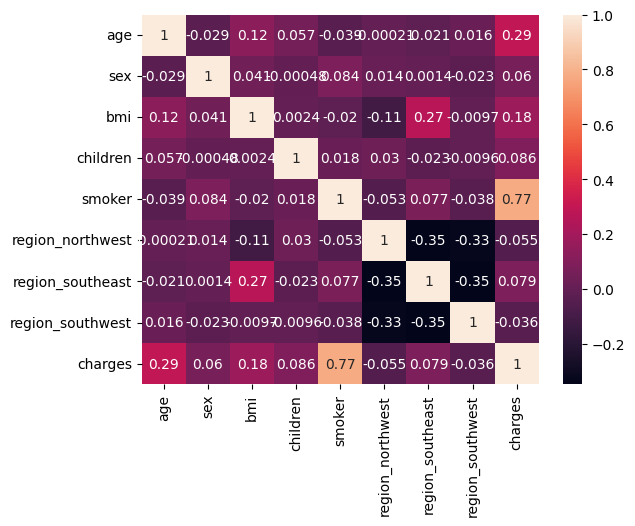

In [37]:
# correlation

temp_df = X_train.copy()
temp_df["charges"] = y_train

sns.heatmap(temp_df.corr(), annot=True)

In [39]:
# calculate vif
import statsmodels.stats.outliers_influence as oi


def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif = calculate_vif(X_train)
vif.sort_values(by = ["VIF"], ascending = False)

,Variables,VIF
2,bmi,11.778800
0,age,7.852117
6,region_southeast,2.290072
1,sex,2.041788
7,region_southwest,2.002452
5,region_northwest,1.941491
3,children,1.806171
4,smoker,1.255160


In [40]:
oi.variance_inflation_factor(temp_df.values, 0)

9.550672861654276

In [41]:
# mutual info

from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_train, y_train)
mi_scores

mi = pd.DataFrame()

mi["col_name"] = X_train.columns
mi["mi_score"] = mi_scores

mi.sort_values(by = "mi_score", ascending = False)
# for i, col in enumerate(X_train.columns):
#     print(f"Mutual Information between {col} and charges: {mi_scores[i]}"

,col_name,mi_score
0,age,1.437263
4,smoker,0.350576
3,children,0.157477
1,sex,0.137112
2,bmi,0.075698
5,region_northwest,0.042278
6,region_southeast,0.027775
7,region_southwest,0.014096


In [42]:
# p- values
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)


model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     358.1
Date:                Fri, 05 Jan 2024   Prob (F-statistic):          4.94e-295
Time:                        12:14:06   Log-Likelihood:                -10831.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1060   BIC:                         2.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.109e+04   1114.260     -9.955      0.000   -1.33e+04   -8906.246
age                248.2107     13.507     18.376      0.000     221.707     274.715
sex               -101.5421    375.787     -0.270      0.787    -838.914     635.829
bmi                318.7014     32.543      9.793      0.000     254.845     382.558
children           533.0100    156.796      3.399      0.001     225.344     840.676
smoker            2.308e+04    471.030     48.994      0.000    2.22e+04     2.4e+04
region_northwest  -391.7615    537.999     -0.728      0.467   -1447.426     663.903
region_southeast  -838.9196    546.101     -1.536      0.125   -1910.481     232.641
region_southwest  -659.1398    539.459     -1.222      0.222   -1717.668     399.388
==============================================================================
Omnibus:                      266.561   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.069
Skew:                           1.330   Prob(JB):                    3.77e-140
Kurtosis:                       5.710   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [44]:
cols = ['age', 'bmi', 'children', 'smoker']

X_train_new = X_train[cols]
X_test_new = X_test[cols]
evaluation(X_train_new, X_test_new)

r2 score---
train_r2: 0.7292, test_r2: 0.8046
-----------------
adj r2 score---
train_adj_r2: 0.7282, test_adj_r2: 0.8016
-----------------
MAE---
train_mae: 4187.5235, test_mae: 4198.5926
-----------------


In [45]:
cols = ['age', 'bmi', 'smoker']

X_train_new = X_train[cols]
X_test_new = X_test[cols]
evaluation(X_train_new, X_test_new)

r2 score---
train_r2: 0.7262, test_r2: 0.805
-----------------
adj r2 score---
train_adj_r2: 0.7254, test_adj_r2: 0.8027
-----------------
MAE---
train_mae: 4227.8274, test_mae: 4191.7043
-----------------


<Axes: >

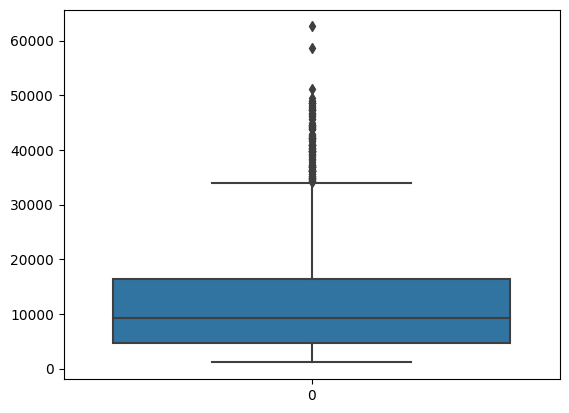

In [47]:
sns.boxplot(y_train)

In [46]:
## log transformation of output column

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [48]:
cols = ['age', 'bmi', 'smoker']

X_train_new = X_train[cols]
X_test_new = X_test[cols]
evaluation(X_train_new, X_test_new, y_train_log, y_test_log)

r2 score---
train_r2: 0.7278, test_r2: 0.8019
-----------------
adj r2 score---
train_adj_r2: 0.7271, test_adj_r2: 0.7996
-----------------
MAE---
train_mae: 0.3071, test_mae: 0.2857
-----------------


In [49]:
# scale input data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train[cols])
X_test_scale = scaler.transform(X_test[cols])

evaluation(X_train_scale, X_test_scale, y_train_log,y_test_log)

r2 score---
train_r2: 0.7278, test_r2: 0.8019
-----------------
adj r2 score---
train_adj_r2: 0.7271, test_adj_r2: 0.7996
-----------------
MAE---
train_mae: 0.3071, test_mae: 0.2857
-----------------


In [51]:
## remove outlier
X_train_new = X_train[cols]
X_test_new = X_test[cols]

q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5*iqr
uw = q3 + 1.5*iqr

drop_index_train = y_train[~((y_train<=uw) & (y_train >=lw))].index
drop_index_test = y_test[~((y_test<=uw) & (y_test >=lw))].index

X_train_new.drop(index = drop_index_train, inplace = True)
X_test_new.drop(index = drop_index_test, inplace = True)

y_train_new = y_train.drop(index = drop_index_train)
y_test_new = y_test.drop(index = drop_index_test)

evaluation(X_train_new, X_test_new, y_train_new, y_test_new)

r2 score---
train_r2: 0.5827, test_r2: 0.6472
-----------------
adj r2 score---
train_adj_r2: 0.5814, test_adj_r2: 0.6426
-----------------
MAE---
train_mae: 2568.189, test_mae: 2278.5009
-----------------


C:\Users\dell\AppData\Local\Temp\ipykernel_9376\2380143882.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(index = drop_index_train, inplace = True)
C:\Users\dell\AppData\Local\Temp\ipykernel_9376\2380143882.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_new.drop(index = drop_index_test, inplace = True)


In [52]:
y_train

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64

In [53]:
## clip outlier

## remove outlier
X_train_new = X_train[cols]
X_test_new = X_test[cols]

q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5*iqr
uw = q3 + 1.5*iqr

y_train_new = np.where(y_train >uw, uw,
                       np.where(y_train < lw, lw,y_train))

y_test_new = np.where(y_test >uw, uw,
                       np.where(y_test < lw, lw,y_test))
evaluation(X_train_new, X_test_new, y_train_new, y_test_new)

r2 score---
train_r2: 0.7209, test_r2: 0.8161
-----------------
adj r2 score---
train_adj_r2: 0.7201, test_adj_r2: 0.814
-----------------
MAE---
train_mae: 3430.6555, test_mae: 3107.7636
-----------------


In [54]:
from sklearn.preprocessing import PolynomialFeatures

temp_df = X_train_new.head()
temp_df

,age,bmi,smoker
1114,23,24.510,0.0
968,21,25.745,0.0
599,52,37.525,0.0
170,63,41.470,0.0
275,47,26.600,0.0


In [55]:
poly = PolynomialFeatures((2,2))
pd.DataFrame(poly.fit_transform(temp_df))

,0,1,2,3,4,5,6
0,1.0,529.0,563.730,0.0,600.740100,0.0,0.0
1,1.0,441.0,540.645,0.0,662.805025,0.0,0.0
2,1.0,2704.0,1951.300,0.0,1408.125625,0.0,0.0
3,1.0,3969.0,2612.610,0.0,1719.760900,0.0,0.0
4,1.0,2209.0,1250.200,0.0,707.560000,0.0,0.0


In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly_col = ["age","bmi", "smoker"]

poly = PolynomialFeatures((2,4), include_bias = False)



In [57]:
temp_poly_X_train = pd.DataFrame(poly.fit_transform(X_train[poly_col]),index = X_train.index)
temp_poly_X_test = pd.DataFrame(poly.transform(X_test[poly_col]),index = X_test.index)


In [58]:
X_train_new = X_train[cols]
X_test_new = X_test[cols]

model = LinearRegression()

model.fit(X_train_new, y_train)

LinearRegression()

In [59]:
import joblib

# save the model to a file
joblib.dump(model, 'insurance_predictor.joblib')

['insurance_predictor.joblib']

In [61]:
model2 = joblib.load("insurance_predictor.joblib")

In [62]:
model2.predict([[24,20,0]])

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1370.19157276])